# 论文名

## 项目介绍

请详细介绍您复现的论文

论文名：Capacity and quantum geometry of parametrized quantum circuits

这篇论文讲述了在量子线路中ansatz的层数不高于特征层数pc时，自然梯度比常规梯度高几个数量级，由此可知自然梯度有利于缓解贫瘠高原现象。另外，还比较了不同纠缠门（CNOT、CPHASE、√iSWAP）以及纠缠门不同的排列方式（CHAIN、ALL、ALT）对量子线路的梯度方差以及redundancy的差异，其中求redundancy需要先由量子线路得到quantum fisher information matrix得出

## 复现过程

请调用您的代码，按照步骤对论文进行复现，并输出复现结果。

In [1]:
import numpy as np
from mindquantum import Circuit
from mindquantum.core import X, Y, Z, H, RX, RY, RZ,Hamiltonian
from mindquantum.simulator import Simulator
from mindquantum.core import UN
from mindquantum import UnivMathGate
from mindquantum import QubitOperator
from mindquantum.framework import MQLayer
from functools import reduce

[WARNING] ME(784204:140356341904704,MainProcess):2023-10-17-18:21:34.883.690 [mindspore/run_check/_check_version.py:102] MindSpore version 2.1.0 and cuda version 11.8.89 does not match, CUDA version [['10.1', '11.1', '11.6']] are supported by MindSpore officially. Please refer to the installation guide for version matching information: https://www.mindspore.cn/install.


In [2]:
#define √iSWAP gate
iSWAP_sqrt_mat = np.array([[1, 0, 0, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)*(0.+1.j), 0],
 [0, 1/np.sqrt(2)*(0.+1.j), 1/np.sqrt(2), 0], [0, 0, 0, 1]])
iSWAP_sqrt_gate = UnivMathGate('√iSWAP', iSWAP_sqrt_mat)


==============================================Circuit Summary==============================================
|Total number of gates  : 67.                                                                             |
|Parameter gates        : 30.                                                                             |
|with 30 parameters are :                                                                                 |
|theta0, theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9..                        .|
|Number qubit of circuit: 10                                                                              |


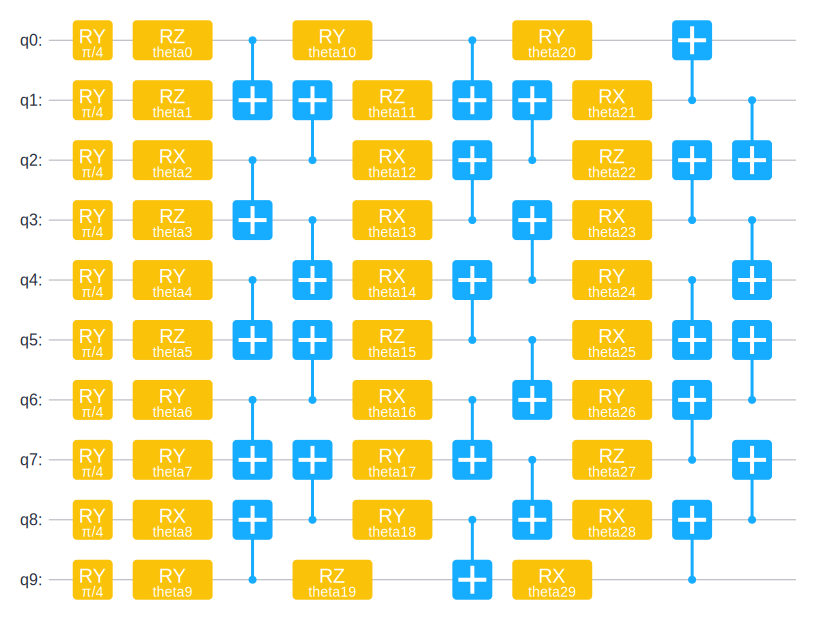

In [3]:
from src.test import circuit
# type of entangling gate used
type_entangler =0
# 0: CNOT, 1:CPHASE, 2: \\sqrt{iSWAP}\n
# how to arrange the entangling layer\n
entangling_arrangement =0
# 0: one-dimensional nearest-neighbor CHAIN, 1: ALl-to-ALL connections, 2:alternating nearest-neighbor connections
n_qubits = 10  # number qubits
depth =3 # repeat times(layer p)
n_parameters = depth * n_qubits  # number of parameters of circuit
cutoff_eigvals=10**-18  #define all eigenvalues of quantum fisher information metric as 0
#define the function of the quantum circuit
circ = circuit(n_qubits,depth,entangling_arrangement,type_entangler)
circ.summary()
circ.svg()

In [4]:
# import the function that return the quantum fisher information matrix.
from src.test import QFI
#define angles for circuit
params=np.random.rand(depth*n_qubits)*2*np.pi
#get the quantum fisher information matrix
QFI_matrix = QFI(circ,params,entangling_arrangement=0,type_entangler =0).real
print(QFI_matrix.shape)

(30, 30)


In [5]:
#import a function that calculate the number of nonzero eigenvalues of a matrix.
from src.test import number_of_zero_eigval
cutoff_eigvals = 10**-18#define all eigenvalues of quantum fisher information metric as 0
#calculate the number of non-zero eigenvalues of the matrix
n_parameters = depth*n_qubits
n_zero_eigval = number_of_zero_eigval(QFI_matrix,n_parameters = depth*n_qubits)
# fraction of zero eigenvalues
redundancy = number_of_zero_eigval(QFI_matrix,n_parameters = depth*n_qubits)/n_parameters
print(redundancy)

0.0


In [6]:
# import a function for finding the variance of a conventional gradient by sampling\n",
from src.test import get_var_partial_exp
#define the Hamiltonian
ham = Hamiltonian(QubitOperator('Z0 Z1'))
#get the variance of gradients
var_gradient = get_var_partial_exp(circ,ham)
print(var_gradient)

9.060626468367254e-07


In [7]:
from src.test import R_vargrad_result    #columns:type_entangler:0: CNOT, 1:CPHASE, 2: \\sqrt{iSWAP}
R,var_gradient=R_vargrad_result(n_qubits,depth) #rows:entangling_arrangement :0:  CHAIN, 1:ALL , 2:ALT
print("depth",depth)
print("redundancy\n",R)   #Rows represent entanglement gate permutations and columns represent entanglement gate types
print("variance of gradients\n",var_gradient)
#example:R[0][0]represents PQC with entanglement gate  CNOT and entanglement gate permutations CHAIN

depth 3
redundancy
 [[0.03333333 0.03333333 0.        ]
 [0.         0.03333333 0.        ]
 [0.03333333 0.06666667 0.        ]]
variance of gradients
 [[1.30464708e-05 7.81222814e-04 4.29077322e-05]
 [4.07707176e-07 1.87977825e-04 2.24664447e-05]
 [3.41956494e-05 6.35320132e-05 8.72598185e-06]]


## 项目总结

简要总结一下您复现的论文、您的复现结果、创新点和未来可继续研究的方向。

这篇论文主要有两部分:

    一、探讨通过自然梯度来缓解贫瘠高原现象，但量子线路中的ansatz层数超过特征层数pc时也会出现贫瘠高原现象，所以，量子线路中的redundancy值可以用来评估的ansatz的特征层数pc，当ansatz层数小于pc时，自然梯度比常规梯度大几个数量级，从而利用自然梯度可以更好地优化参数，从而使量子线路的表达能力更强。
    
    二、比较不同纠缠门（CNOT、CPHASE、√iSWAP）以及纠缠门不同的排列方式（CHAIN、ALL、ALT）对量子线路的梯度方差以及redundancy的差异;

从复现结果可得：

       1）纠缠门由CPHASE gate组成的PQC所得到的redundancy无论ansatz是哪种排列方式，都要比CNOT gate或sqrt(iSWAP) gate组成的PQC都要高；
    
       2）由CNOT或√iSWAP门构造的PQC具有更低的梯度方差，与使用CPHASE门的PQC相比，具有更高的表达能力;
    
       3）参数冗余度（R）的变化取决于PQC的门的类型和排列方式。